# BosonicEntanglementDistillation

## Imports

In [56]:
import os
import qutip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from State import State
from Operator import Operator
from PlotUtils import PlotUtils
from Simulation import Simulation
from DecodeUtils import DecodeUtils
from SimulationDiscreteErrorModel import SimulationDiscreteErrorModel
from SimulationContinuousErrorModel import SimulationContinuousErrorModel

## Basic Operations

### Creating states

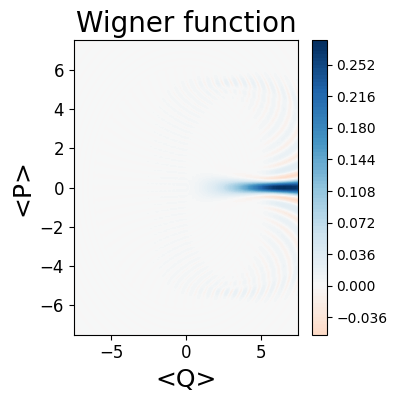

In [51]:
pegg_barnett = State.create('pegg-barnett', number_of_fock_states=60, angle_in_radians=0)
fig, axes = plt.subplots(1, 1)
fig.set_figwidth(4)
fig.set_figheight(4)
qutip.plot_wigner(pegg_barnett, fig, axes, colorbar=True)
PlotUtils.edit_graph(axes, '<Q>', '<P>', 'Wigner function')

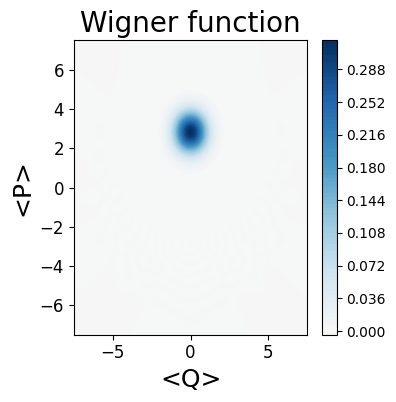

In [52]:
coherent = State.create('coherent', number_of_fock_states=60, alpha=2j)
fig, axes = plt.subplots(1, 1)
fig.set_figwidth(4)
fig.set_figheight(4)
qutip.plot_wigner(coherent, fig, axes, colorbar=True)
PlotUtils.edit_graph(axes, '<Q>', '<P>', 'Wigner function')

### Creating operators

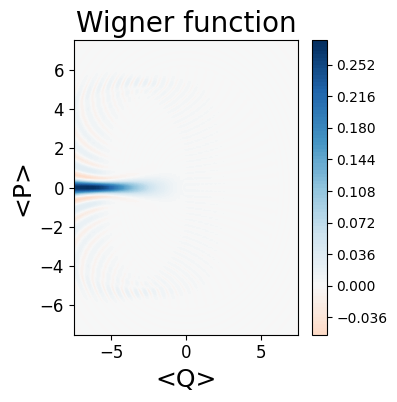

In [53]:
rotation_operator = Operator.create('rotation', number_of_fock_states=60, angle_in_radians = np.pi)
rotated_pegg_barnett = pegg_barnett.apply_operator(rotation_operator)
fig, axes = plt.subplots(1, 1)
fig.set_figwidth(4)
fig.set_figheight(4)
qutip.plot_wigner(rotated_pegg_barnett, fig, axes, colorbar=True)
PlotUtils.edit_graph(axes, '<Q>', '<P>', 'Wigner function')

## Basic Simulations

### Simple case - 1 cavity, 4 rotated Pegg-Barnett states

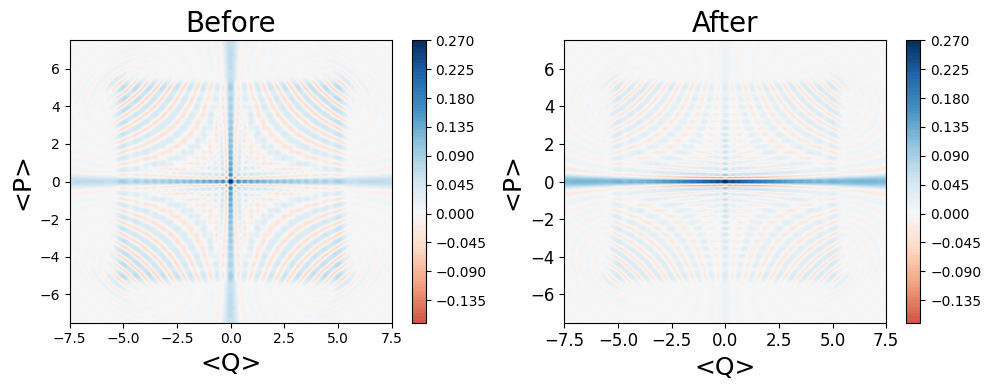

In [54]:
simulation = Simulation(number_of_fock_states=60)
PlotUtils.plot_wigner_function_comparison(simulation.initial_state, simulation.state_after_protocol)

### Simple case - 1 cavity, 4 rotated coherent states

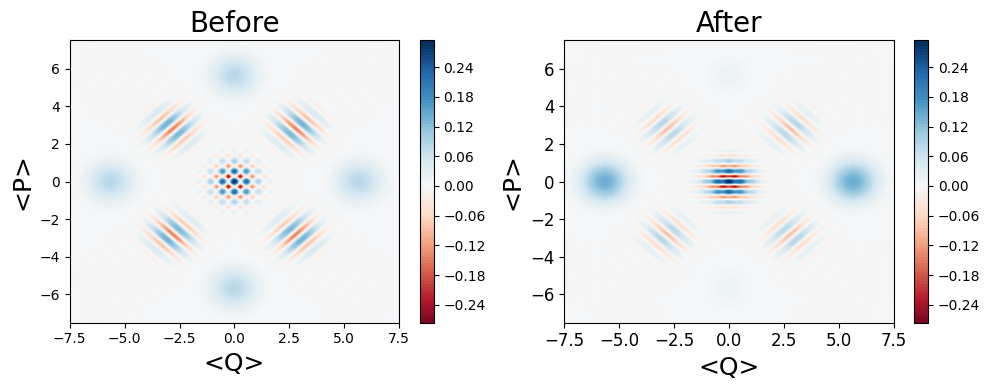

In [11]:
simulation = Simulation(number_of_fock_states=60, initial_state_name='coherent', alpha=4)
PlotUtils.plot_wigner_function_comparison(simulation.initial_state, simulation.state_after_protocol)

### Simple protocol, no errors - 2 cavities, 4 rotated Pegg-Barnett states

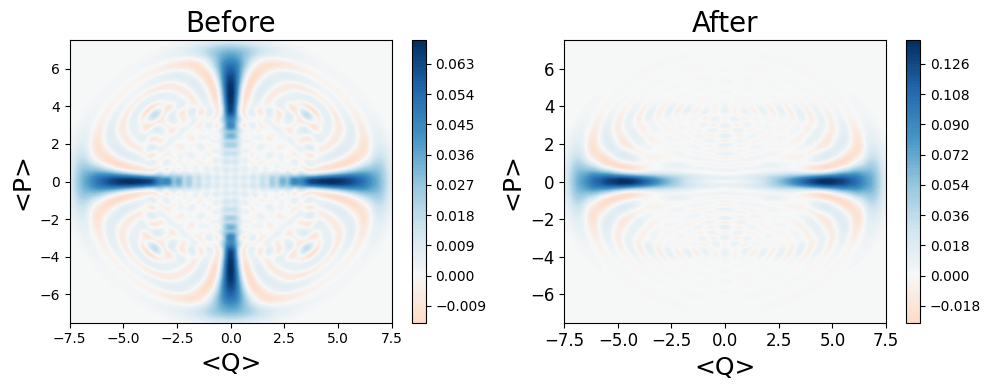

In [12]:
simulation = Simulation(number_of_fock_states=30, number_of_parties=2)
PlotUtils.plot_wigner_function_comparison(simulation.initial_state.ptrace(0), simulation.state_after_protocol.ptrace(0))

## Adding Noise

### Discrete error model - 2 cavities, 4 rotated Pegg-Berrnett states

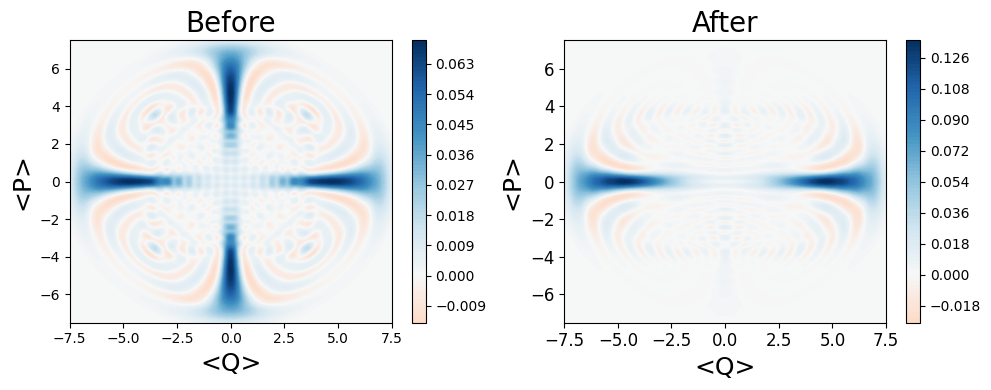

In [21]:
simulation = SimulationDiscreteErrorModel(number_of_fock_states=30, rotation_probability=0.1)
PlotUtils.plot_wigner_function_comparison(simulation.noisy_state.ptrace(0), simulation.state_after_protocol.ptrace(0))

### Continuous error model - 2 cavities, 4 rotated Pegg-Berrnett states, $κt = 0.02$

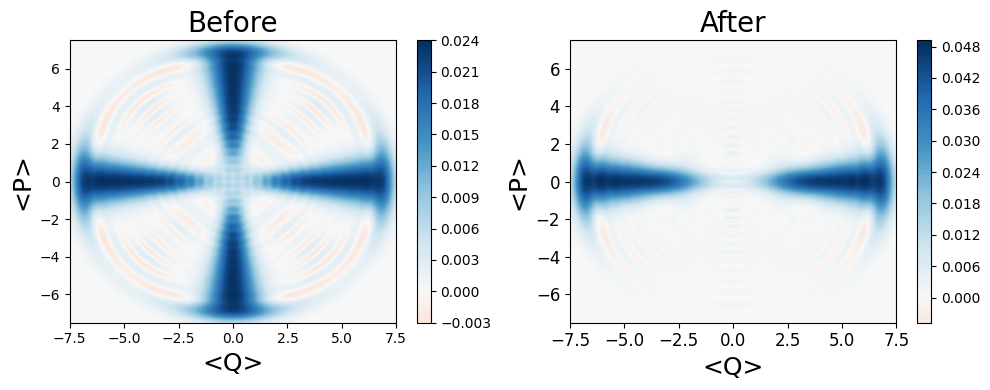

In [59]:
simulation = SimulationContinuousErrorModel(
    number_of_fock_states=30,
    number_of_rotations=4,
    number_of_parties=2,
    kappa_dephase=0.02,
    kappa_decay=0.02)
PlotUtils.plot_wigner_function_comparison(simulation.noisy_state.ptrace(0), simulation.state_after_protocol.ptrace(0))

## Decoding

In [61]:
decoded_state_before_protocol = DecodeUtils.decode(
    simulation.noisy_state,
    number_of_fock_states=30,
    number_of_parties=2,
    number_of_parts=2,
    center_angle_in_radians = np.pi/4)

decoded_state_after_protocol = DecodeUtils.decode(
    simulation.state_after_protocol,
    number_of_fock_states=30,
    number_of_parties=2,
    number_of_parts=2)

### Calculate Fidelity

In [62]:
reference_state = np.zeros([4, 4])

reference_state[0, 0] = 0.5
reference_state[-1, -1] = 0.5
reference_state[0, -1] = 0.5
reference_state[-1, 0] = 0.5
reference_state = qutip.Qobj(reference_state)

print("Fidelity before: " + str(qutip.fidelity(reference_state, decoded_state_before_protocol)))
print("Fidelity After: " + str(qutip.fidelity(reference_state, decoded_state_after_protocol)))

Fidelity before: 0.8082484181395373
Fidelity After: 0.8111821588174027
